#**BAN510 - GAME ANALYTICS PROJECT**

###Import Python Modules

In [ ]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn as sk

In [ ]:
#Reading data
df = pd.read_excel('/content/sample_data/Apex-Games-new-game-data.xlsx', index_col='Player_ID')
df.head()

,Session_Date,Session_Length (mins),Levels_Completed (Number),In-Game_Purchases (USD),Ads_Watched (Number),Day_1_Retention,Day_30_Retention,Total_sessions_played,Country,Device_Type,Favorite_Color,Preferred_Game_Genre,Favorite_Movie,Most_Expensive_Item_Purchased,Level_Spent_Most_Money_On
Player_ID,,,,,,,,,,,,,,,
1059,9/1/2024,25,5,12,3,1.0,1,69,USA,iOS,Purple,Strategy,Star Wars,Shield,4
1060,9/2/2024,10,1,42,0,0.0,0,1,India,Android,Blue,Adventure,Inception,Potion,7
1061,9/1/2024,45,8,9,5,1.0,1,118,UK,iOS,Green,Puzzle,Inception,Potion,5
1062,9/1/2024,97,10,76,2,1.0,1,80,Brazil,Android,Red,Strategy,Matrix,Potion,7
1063,9/3/2024,15,2,16,0,1.0,0,31,Germany,Android,Green,Puzzle,Matrix,Sword,1


In [ ]:
#read the las 5 rows of the dataset
df.tail()

,Session_Date,Session_Length (mins),Levels_Completed (Number),In-Game_Purchases (USD),Ads_Watched (Number),Day_1_Retention,Day_30_Retention,Total_sessions_played,Country,Device_Type,Favorite_Color,Preferred_Game_Genre,Favorite_Movie,Most_Expensive_Item_Purchased,Level_Spent_Most_Money_On
Player_ID,,,,,,,,,,,,,,,
1089,9/4/2024,32,3,32,0,0.0,0,1,Brazil,iOS,Blue,Adventure,Avatar,Gems,6
1090,9/4/2024,62,3,67,0,0.0,0,2,UK,Android,Blue,Action,Inception,Armor,7
1091,9/3/2024,105,7,7,2,1.0,1,100,USA,iOS,Blue,Action,Inception,Armor,5
1092,9/1/2024,59,6,21,2,1.0,1,139,UK,iOS,Green,Puzzle,Matrix,Sword,5
1093,9/6/2024,5,7,50,0,1.0,0,11,USA,iOS,Green,Adventure,Matrix,Potion,4


# **Data cleaning and preprocessing**

In [ ]:
#What are the total rows and columns for the dataset
df.shape

(35, 15)

In [ ]:
 # info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1059 to 1093
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Session_Date                   35 non-null     object 
 1   Session_Length (mins)          35 non-null     int64  
 2   Levels_Completed (Number)      35 non-null     object 
 3   In-Game_Purchases (USD)        35 non-null     int64  
 4   Ads_Watched (Number)           35 non-null     int64  
 5   Day_1_Retention                34 non-null     float64
 6   Day_30_Retention               35 non-null     int64  
 7   Total_sessions_played          35 non-null     int64  
 8   Country                        35 non-null     object 
 9   Device_Type                    35 non-null     object 
 10  Favorite_Color                 35 non-null     object 
 11  Preferred_Game_Genre           35 non-null     object 
 12  Favorite_Movie                 35 non-null     objec

In [ ]:
#Session_Date doesnot have the correct data type.There is string value to be investigated
#Levels_Completed (Number)  has a string value
#Day_1_Retention has a missing value

print (df.isnull().sum())

Session_Date                     0
Session_Length (mins)            0
Levels_Completed (Number)        0
In-Game_Purchases (USD)          0
Ads_Watched (Number)             0
Day_1_Retention                  1
Day_30_Retention                 0
Total_sessions_played            0
Country                          0
Device_Type                      0
Favorite_Color                   0
Preferred_Game_Genre             0
Favorite_Movie                   0
Most_Expensive_Item_Purchased    0
Level_Spent_Most_Money_On        0
dtype: int64


In [ ]:
#1. Change the data type of the Session_Date column
df['Session_Date'] = df['Session_Date'].apply(pd.to_datetime)

#2. Converting the data type of Day_1_Retention to numeric
df['Day_1_Retention'] = df['Day_1_Retention'].apply(pd.to_numeric, errors='coerce')

# 3 Converting word to number on the  Levels_Completed column
# Function to convert word to number
def word_to_number(word):
    try:
        # Try converting to a number directly
        return int(word)
    except ValueError:
        # If not a number, check for specific words
        if word.lower() == "eleven":
            return 11
        else:
            return word  # Or raise ValueError(f"Invalid word: {word}")

df['Levels_Completed (Number)'] = df['Levels_Completed (Number)'].apply(word_to_number)

#df

In [ ]:
#Change the Nan values to an average values and convert float to int
#df['Day_1_Retention'].fillna(df['Day_1_Retention'].mean(), inplace=True)
df['Day_1_Retention'] = df['Day_1_Retention'].fillna(df['Day_1_Retention'].mean())
df['Day_1_Retention'] = df['Day_1_Retention'].astype(int)

print (df.isnull().sum())

Session_Date                     0
Session_Length (mins)            0
Levels_Completed (Number)        0
In-Game_Purchases (USD)          0
Ads_Watched (Number)             0
Day_1_Retention                  0
Day_30_Retention                 0
Total_sessions_played            0
Country                          0
Device_Type                      0
Favorite_Color                   0
Preferred_Game_Genre             0
Favorite_Movie                   0
Most_Expensive_Item_Purchased    0
Level_Spent_Most_Money_On        0
dtype: int64


In [ ]:
#Descriptive analytics
df.describe()

,Session_Date,Session_Length (mins),Levels_Completed (Number),In-Game_Purchases (USD),Ads_Watched (Number),Day_1_Retention,Day_30_Retention,Total_sessions_played,Level_Spent_Most_Money_On
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2024-09-02 17:08:34.285714176,64.142857,6.142857,397.628571,2.142857,0.771429,0.485714,53.028571,6.400000
min,2024-09-01 00:00:00,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2024-09-01 00:00:00,31.000000,3.000000,15.000000,0.500000,1.000000,0.000000,5.500000,4.000000
50%,2024-09-02 00:00:00,66.000000,7.000000,41.000000,2.000000,1.000000,0.000000,31.000000,6.000000
75%,2024-09-04 00:00:00,95.500000,8.000000,67.000000,3.000000,1.000000,1.000000,91.500000,9.000000
max,2024-09-06 00:00:00,118.000000,12.000000,12500.000000,5.000000,1.000000,1.000000,173.000000,12.000000
std,NaN,36.286558,3.264271,2106.073306,1.734475,0.426043,0.507093,51.156902,3.300624


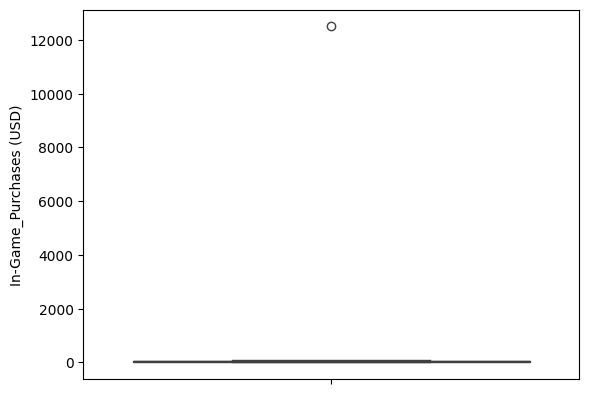

In [ ]:
# Outlier detected In_Game_Purchases (USD) column
sns.boxplot(df['In-Game_Purchases (USD)'])
plt.show()

In [ ]:
#Changing the outlier into Nan
df.loc[df['In-Game_Purchases (USD)']> 100, 'In-Game_Purchases (USD)'] = np.nan

#Then Change the Nan values to an average values and convert float to int
df['In-Game_Purchases (USD)'] = df['In-Game_Purchases (USD)'].fillna(df['In-Game_Purchases (USD)'].mean())
df['In-Game_Purchases (USD)'] = df['In-Game_Purchases (USD)'].astype(int)

# checking the column
#df['In-Game_Purchases (USD)']

In [ ]:
# Checking ubique values on country col
df['Country'].unique()

array(['USA', 'India', 'UK', 'Brazil', 'Germany', 'Japan_Osaka', 'Canada',
       'Australia', 'Japan '], dtype=object)

In [ ]:
#convert Japan_Osaka to Japan on the country column
df['Country'] = df['Country'].str.strip()
df['Country'] = df['Country'].replace('Japan_Osaka  ', 'Japan')

df['Country'].unique()

array(['USA', 'India', 'UK', 'Brazil', 'Germany', 'Japan', 'Canada',
       'Australia'], dtype=object)

#**Exploratory Data Analysis**

In [ ]:
# Plot number of players by country

country_counts = df['Country'].value_counts().sort_values(ascending=False)

fig = px.bar(
    country_counts,
    x=country_counts.values,
    y=country_counts.index,
    orientation='h',
    color=country_counts.index,
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Total Players By Country',
    labels={'x': 'Count', 'y': 'Country'},
)
fig.show()

In [ ]:
df.describe()

,Session_Date,Session_Length (mins),Levels_Completed (Number),In-Game_Purchases (USD),Ads_Watched (Number),Day_1_Retention,Day_30_Retention,Total_sessions_played,Level_Spent_Most_Money_On
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2024-09-02 17:08:34.285714176,64.142857,6.142857,41.657143,2.142857,0.771429,0.485714,53.028571,6.400000
min,2024-09-01 00:00:00,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2024-09-01 00:00:00,31.000000,3.000000,15.000000,0.500000,1.000000,0.000000,5.500000,4.000000
50%,2024-09-02 00:00:00,66.000000,7.000000,41.000000,2.000000,1.000000,0.000000,31.000000,6.000000
75%,2024-09-04 00:00:00,95.500000,8.000000,66.000000,3.000000,1.000000,1.000000,91.500000,9.000000
max,2024-09-06 00:00:00,118.000000,12.000000,96.000000,5.000000,1.000000,1.000000,173.000000,12.000000
std,NaN,36.286558,3.264271,31.278580,1.734475,0.426043,0.507093,51.156902,3.300624


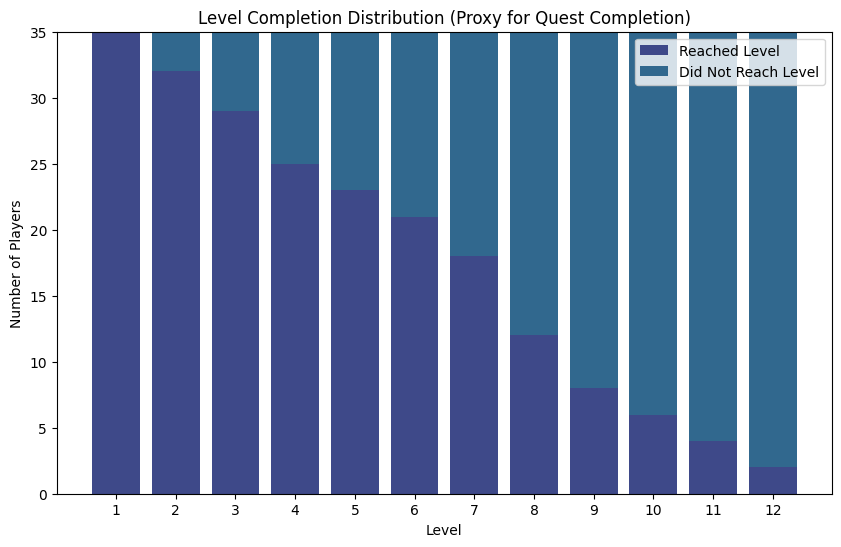

In [ ]:
#1. PLAYER PROGRESSION ANALYSIS

# 1.1. Quest Completion Rate
# Get the maximum level completed by any player
max_level = df['Levels_Completed (Number)'].max()

# Create arrays to store level completion data
levels = np.arange(1, max_level + 1)
reached_level_counts = []
not_reached_level_counts = []

# Calculate completion counts for each level
for level in levels:
    reached_level_counts.append(len(df[df['Levels_Completed (Number)'] >= level]))
    not_reached_level_counts.append(len(df[df['Levels_Completed (Number)'] < level]))

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the bars for players who reached the level
plt.bar(levels, reached_level_counts, label='Reached Level', color='#3e4989')

# Plot the bars for players who did not reach the level
plt.bar(levels, not_reached_level_counts, bottom=reached_level_counts, label='Did Not Reach Level', color='#31688e')

# Customize the chart
plt.xlabel("Level")
plt.ylabel("Number of Players")
plt.title("Level Completion Distribution (Proxy for Quest Completion)")
plt.xticks(levels)
plt.legend()

plt.show()

In [ ]:
#1.2. Leveling Curve
# Calculate the number of players at each level
level_counts = df['Levels_Completed (Number)'].value_counts().sort_index()

# Calculate the cumulative number of players at each level
cumulative_players = level_counts.cumsum()

# Create the interactive leveling curve plot
fig = go.Figure(data=[go.Scatter(
    x=cumulative_players.index,
    y=cumulative_players.values,
    mode='lines+markers',
    line=dict(color='#3e4989')  # Set line color
)])

# Customize the plot
fig.update_layout(
    title="Leveling Curve",
    xaxis_title="Level",
    yaxis_title="Cumulative Number of Players",
    hovermode="x"  # Enable hover interaction
)

fig.show()

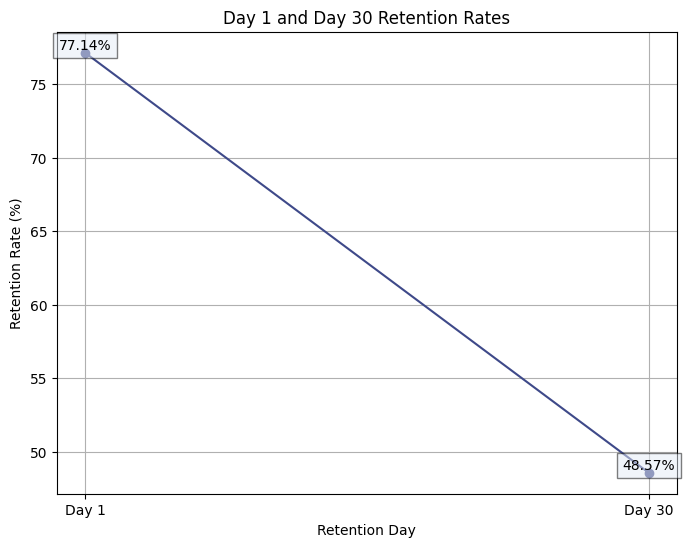

In [ ]:
# 2. RETENTION RATES
# 2.1. 1-Day and 30-Day Retention Rates

# Calculate retention rates
day_1_retention_rate = df['Day_1_Retention'].mean() * 100
day_30_retention_rate = df['Day_30_Retention'].mean() * 100

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(['Day 1', 'Day 30'], [day_1_retention_rate, day_30_retention_rate], marker='o', color='#3e4989')

# Customize the chart
ax.set_xlabel("Retention Day")
ax.set_ylabel("Retention Rate (%)")
ax.set_title("Day 1 and Day 30 Retention Rates")
ax.grid(True)
ax.text('Day 1', day_1_retention_rate, f'{day_1_retention_rate:.2f}%', ha='center', va='bottom', bbox=dict(facecolor='#e5ecf6', alpha=0.5))
ax.text('Day 30', day_30_retention_rate, f'{day_30_retention_rate:.2f}%', ha='center', va='bottom', bbox=dict(facecolor='#e5ecf6', alpha=0.5))

plt.show()


In [ ]:
# 2.2. Distribution of Session Lengths
#Create Histogram
fig = px.histogram(df,
                   x="Session_Length (mins)",
                   nbins=20,
                   title="Distribution of Session Lengths",
                   labels={'Session_Length (mins)': 'Session Length (minutes)',
                           'count': 'Number of Players'})
fig.update_traces(marker_color='#3e4989', marker_line_color='black', marker_line_width=1)
fig.show()


In [ ]:
# 2.3. Retention rate by device
#Group by 'Device_Type' and calculate the mean of 'Day_1_Retention' and 'Day_30_Retention'
retention_by_device = df.groupby('Device_Type')[['Day_1_Retention', 'Day_30_Retention']].mean() *100

# Display the result
print(retention_by_device)

             Day_1_Retention  Day_30_Retention
Device_Type                                   
Android            75.000000         37.500000
iOS                78.947368         57.894737


In [ ]:
# 2.4. Retention rate by device visualization
# Group by 'Device_Type' and calculate the mean of 'Day_1_Retention' and 'Day_30_Retention'
retention_by_device = df.groupby('Device_Type')[['Day_1_Retention', 'Day_30_Retention']].mean() * 100

# Reset index to make 'Device_Type' a column for plotting
retention_by_device = retention_by_device.reset_index()

# Melt the DataFrame for easier plotting with Plotly Express
retention_by_device_melted = pd.melt(retention_by_device, id_vars=['Device_Type'],
                                     value_vars=['Day_1_Retention', 'Day_30_Retention'],
                                     var_name='Retention_Day', value_name='Retention_Rate')

# Create the grouped bar chart
fig = px.bar(retention_by_device_melted,
             x='Device_Type',
             y='Retention_Rate',
             color='Retention_Day',
             barmode='group',  # Group bars by device type
             title='Retention Rate by Device',
             labels={'Retention_Rate': 'Retention Rate (%)', 'Device_Type': 'Device Type'},
             color_discrete_map={'Day_1_Retention': '#3e4989', 'Day_30_Retention': '#31688e'})  # Custom colors

fig.update_layout(yaxis_range=[0, 100])  # Set y-axis range for better visualization

In [ ]:
#2.5. Retention rate by Country
# Group by 'Country' and calculate the mean of 'Day_1_Retention' and 'Day_30_Retention'
retention_by_country = df.groupby('Country')[['Day_1_Retention', 'Day_30_Retention', ]].mean() * 100

# Display the result
print(retention_by_country)

             Day_1_Retention  Day_30_Retention
Country                                       
Australia         100.000000        100.000000
Brazil             50.000000         25.000000
Canada            100.000000        100.000000
Germany           100.000000         25.000000
India              75.000000         75.000000
Japan               0.000000          0.000000
Japan_Osaka       100.000000          0.000000
UK                 60.000000         40.000000
USA                85.714286         57.142857


In [ ]:
# 2.5.1. Retention rate by Country

# Replace 'Japan_Osaka' with 'Japan' in the 'Country' column
df['Country'] = df['Country'].replace('Japan_Osaka', 'Japan')

# Group by 'Country' and calculate the mean of 'Day_1_Retention' and 'Day_30_Retention'
retention_by_country = df.groupby('Country')[['Day_1_Retention', 'Day_30_Retention']].mean() * 100

# Reset index to make 'Country' a column for plotting
retention_by_country = retention_by_country.reset_index()

# Melt the DataFrame for easier plotting with Plotly Express
retention_by_country_melted = pd.melt(retention_by_country, id_vars=['Country'],
                                     value_vars=['Day_1_Retention', 'Day_30_Retention'],
                                     var_name='Retention_Day', value_name='Retention_Rate')

# Create the grouped bar chart
fig = px.bar(retention_by_country_melted,
             x='Country',
             y='Retention_Rate',
             color='Retention_Day',
             barmode='group',  # Group bars by country
             title='Retention Rate by Country',
             labels={'Retention_Rate': 'Retention Rate (%)', 'Country': 'Country'},
             color_discrete_map={'Day_1_Retention': '#3e4989', 'Day_30_Retention': '#31688e'})  # Custom colors

fig.update_layout(xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                  yaxis_range=[0, 100])  # Set y-axis range for better visualization

fig.show()

In [ ]:
#3. IN-GAME PURCHASE BEHAVIOUR
#3.1. Total Revenue by country
df_Purchase_By_Country = df.groupby('Country')['In-Game_Purchases (USD)'].sum().sort_values(ascending=False)

fig = px.bar(
    df_Purchase_By_Country,
    y = df_Purchase_By_Country.index,
    x = df_Purchase_By_Country.values,
    orientation='h',
    color=df_Purchase_By_Country.index,
    color_discrete_sequence=px.colors.sequential.Viridis,
    title='Total In_Game Purchases (USD)',
    labels={'x': 'Total Revenue (In-Game Purchases)', 'y': 'Country'},
)
fig.show()

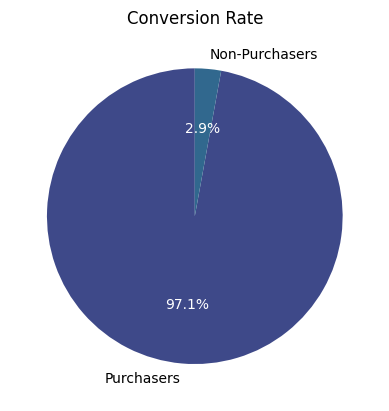

In [ ]:
# 3.2. Conversion Rate

labels = ['Purchasers', 'Non-Purchasers']
conversion_rate = (df['In-Game_Purchases (USD)'] > 0).mean() * 100
sizes = [conversion_rate, 100 - conversion_rate]

# Create the pie chart with labels outside
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#3e4989', '#31688e'], textprops={'color': "k"})

#set color of percentage to white
for autotext in autotexts:
    autotext.set_color('white')

plt.title("Conversion Rate")
plt.show()

In [ ]:
#3.3. Preferred_Game_Genre by revenue
df_Game_Genere_By_Purchase =df.groupby('Preferred_Game_Genre')['In-Game_Purchases (USD)'].sum().sort_values(ascending=False)

fig = px.pie(df_Game_Genere_By_Purchase,
             values='In-Game_Purchases (USD)',
             names=df_Game_Genere_By_Purchase.index,
             title='Total Revenue by Preferred Game Genre', # Moved to the previous line
             color_discrete_sequence=px.colors.sequential.Viridis) # Corrected the indentation
fig.show()

In [ ]:
#3.4.Total Revenue By Level Completed
df_Revenue_By_Level = df.groupby('Levels_Completed (Number)')['In-Game_Purchases (USD)'].sum()
fig = px.line(df_Revenue_By_Level,
              x=df_Revenue_By_Level.index,
              y=df_Revenue_By_Level.values,
              title='Total Revenue by Level Completed',
              labels={'x':'Levels Completed (Number)', 'y':'Total In-Game Purchases (USD)'},
              markers=True)
fig.show()

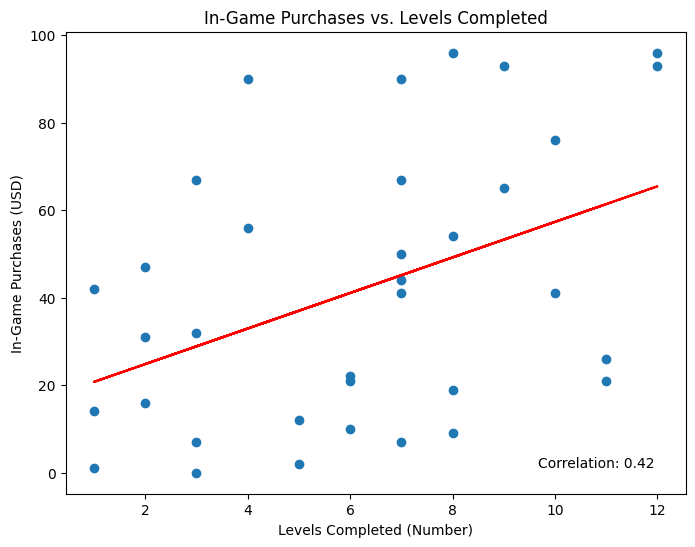

In [ ]:
# 3.5. In-Game Purchase vs. Levels Completed
correlation = df['Levels_Completed (Number)'].corr(df['In-Game_Purchases (USD)'])
plt.figure(figsize=(8, 6))
plt.scatter(df['Levels_Completed (Number)'], df['In-Game_Purchases (USD)'])
z = np.polyfit(df['Levels_Completed (Number)'], df['In-Game_Purchases (USD)'], 1)  # 1 for linear trend
p = np.poly1d(z)
plt.plot(df['Levels_Completed (Number)'], p(df['Levels_Completed (Number)']), "r--")
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, ha='right', va='bottom')
plt.xlabel('Levels Completed (Number)')
plt.ylabel('In-Game Purchases (USD)')
plt.title('In-Game Purchases vs. Levels Completed')
plt.show()

In [ ]:
# 3.6. In-Game Purchases Over Time

df_agg = df.groupby('Session_Date')['In-Game_Purchases (USD)'].sum().reset_index()
fig = px.line(df_agg,
              x='Session_Date',
              y='In-Game_Purchases (USD)',
              title='Total In-Game Purchases Over Time',
              markers=True)  # Show markers on the line)
fig.update_layout(xaxis_tickangle=-45)  # Rotate by -45 degrees (counter-clockwise)

fig.show()

In [ ]:
# 3.7. Most Expensive Item Purchased
most_expensive_items = df.groupby('Most_Expensive_Item_Purchased')['In-Game_Purchases (USD)'].sum().sort_values(ascending=False)
fig = px.bar(
    x=most_expensive_items.index,
    y=most_expensive_items.values,
    title="Most Expensive Items Purchased",
    labels={'x': 'Expensive Items', 'y': 'Total Revenue'}
)
fig.show()

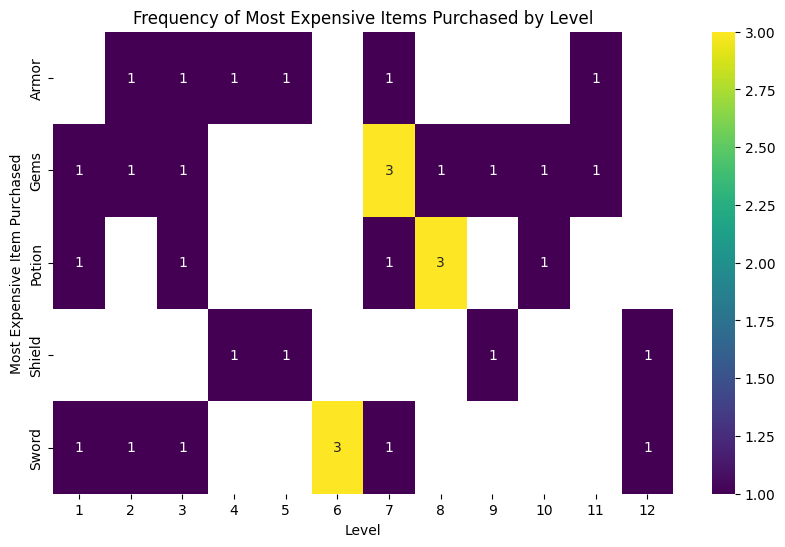

In [ ]:
# 3.8. Most Expensive Items Puchased: Level
grouped_data = df.groupby(['Most_Expensive_Item_Purchased', 'Levels_Completed (Number)'])['In-Game_Purchases (USD)'].agg(['count', 'sum'])
grouped_data = grouped_data.reset_index()
grouped_data.columns = ['Item', 'Level', 'Frequency', 'Revenue']
heatmap_data = grouped_data.pivot(index='Item', columns='Level', values='Frequency')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Level')
plt.ylabel('Most Expensive Item Purchased')
plt.title('Frequency of Most Expensive Items Purchased by Level')
plt.show()

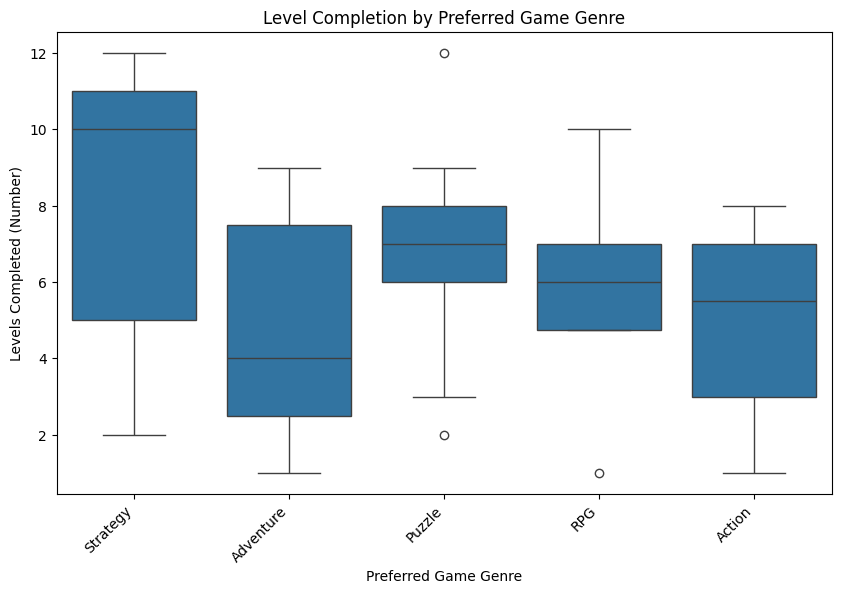

In [ ]:
# 3.9. Preferred Game Genre Influence on Level of Completion of Players
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preferred_Game_Genre', y='Levels_Completed (Number)', data=df)
plt.xlabel('Preferred Game Genre')
plt.ylabel('Levels Completed (Number)')
plt.title('Level Completion by Preferred Game Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# 3.10. Ads Watched vs. Purchases
correlation2 = df['Ads_Watched (Number)'].corr(df['In-Game_Purchases (USD)'])
#correlation2
fig = px.scatter(df,
                 y='In-Game_Purchases (USD)',
                 x='Ads_Watched (Number)',
                 title='In-Game Purchases vs. Ads Watched')
fig.show()


In [ ]:
correlation2

-0.1340618001742534

In [ ]:
#3.11. Revenue By Device
df_device = df.groupby('Device_Type')['In-Game_Purchases (USD)'].sum().sort_values(ascending=False)
fig = px.pie(df_device,
             values='In-Game_Purchases (USD)',
             names=df_device.index,
             title='Total Revenue by Device',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

In [ ]:
#3.12. Device by Country and Total Revenue
df.groupby(['Country','Device_Type'])['In-Game_Purchases (USD)'].sum()


Country    Device_Type
Australia  iOS             65
Brazil     Android         76
           iOS            129
Canada     iOS             44
Germany    Android        205
           iOS             67
India      Android        157
           iOS             26
Japan      Android          0
           iOS             31
UK         Android         89
           iOS             30
USA        Android        273
           iOS            266
Name: In-Game_Purchases (USD), dtype: int64

In [ ]:
df.groupby(['Ads_Watched (Number)'])['In-Game_Purchases (USD)'].sum()

,In-Game_Purchases (USD)
Ads_Watched (Number),
0,468
1,74
2,321
3,372
4,70
5,153


In [ ]:
df.columns

Index(['Session_Date', 'Session_Length (mins)', 'Levels_Completed (Number)',
       'In-Game_Purchases (USD)', 'Ads_Watched (Number)', 'Day_1_Retention',
       'Day_30_Retention', 'Total_sessions_played', 'Country', 'Device_Type',
       'Favorite_Color', 'Preferred_Game_Genre', 'Favorite_Movie',
       'Most_Expensive_Item_Purchased', 'Level_Spent_Most_Money_On'],
      dtype='object')